## Création d'un modèle prédictif simple avec régression linéaire...

Dans ce notebook, nous allons explorer comment créer un modèle de régression linéaire simple en utilisant Python. 

#### Pour ce live-coding, nous utiliserons un jeu de données qui recensent les salaires, l'âge et l'expérience de chaque individus pour prédire les salaires en fonctions des autres variables.

### Contexte :

La régression linéaire est l'une des techniques les plus fondamentales et les plus couramment utilisées en machine learning et en statistique. Elle permet de modéliser la relation entre une variable ou des variables indépendantes (ou prédictrice) et une variable dépendante (ou cible) en ajustant une ligne droite (ou hyperplan en cas de régression linéaire multiple) aux données observées.

### L'objectif de ce notebook pour ce live-coding est de :

##### De montrer comment entraîner un modèle de régression linéaire simple, et de comprendre comment la prédiction s'opère.

##### Let's code !

# Comprendre la régression linéaire...

### Commençons par importer les packages nécessaires et le jeu de donnée :

In [85]:
# Importation des packages nécessaires pour explorer le jeu de donnée :

import numpy as np # Utile pour les principes de vectorisations
import pandas as pd # Nous allons manipuler les données sur un objet dataframe
import matplotlib.pyplot as plt # Utile pour visualiser les données
import seaborn as sns # Également utile pour visualiser les données

# Packages permettant de faire du machine learning :

from sklearn.model_selection import train_test_split # Nous permet de diviser un dataframe en 'train' et 'test'
from sklearn.linear_model import LinearRegression # Nous allons pouvoir avec ce module, créer la fonction de la régression linéaire
from sklearn.metrics import mean_squared_error, r2_score # Ce sont les métriques qui évaluerons notre modèle
from sklearn.preprocessing import StandardScaler, MinMaxScaler # C'est pour initialiser la normalisation de nos données
from math import sqrt # Ce package permet de manipuler les modèles de régression si nécessaire

In [86]:
# Importation de notre jeu de donnée :

df_income = pd.read_csv('../datasets/income.csv')
df_income

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


### Explorons la donnée :

In [87]:
# Méthodes classique permettant de comprendre notre jeu de donnée :

print(f"Le dataframe à {df_income.shape[0]} éléments sur la première dimensions et {df_income.shape[1]} sur la deuxième dimension.")
print(f"Les colonnes sont: l'{df_income.columns[0]}, l'{df_income.columns[1]} et l'{df_income.columns[2]}.")
print("\nLes types de données:")
print(df_income.info())
print("\n Les statistiques descriptives:")
print(df_income.describe())

Le dataframe à 20 éléments sur la première dimensions et 3 sur la deuxième dimension.
Les colonnes sont: l'age, l'experience et l'income.

Les types de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes
None

 Les statistiques descriptives:
             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


Points à relever :
- Le jeu de donnée ne présente pas de valeurs manquantes, nos variables comportent des données de type integers.
- Nous pouvons nous attarder sur les métriques principales, la moyenne, la médiane ainsi que l'écart-type de nos variables.

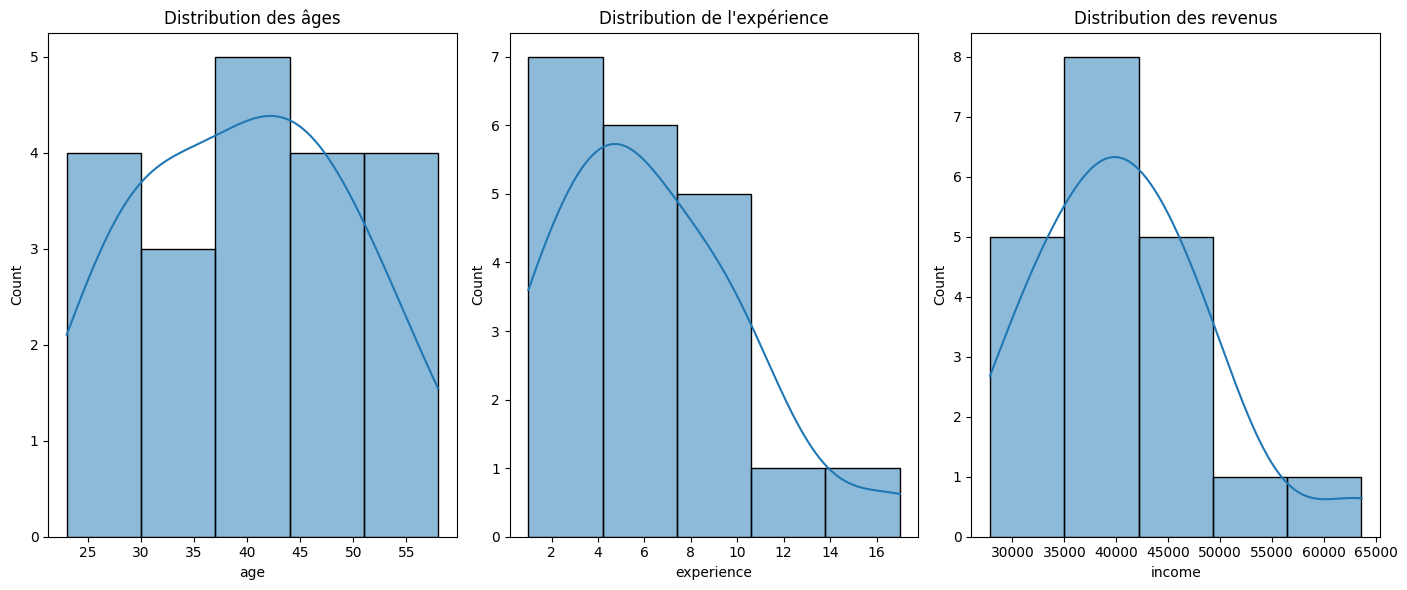

In [88]:
# Code permettant de visualiser la distribution des âges :

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(df_income['age'], kde=True, bins=5)
plt.title('Distribution des âges')

# Code permettant de visualiser la distribution de l'experience :

plt.subplot(1, 3, 2)
sns.histplot(df_income['experience'], kde=True, bins=5)
plt.title('Distribution de l\'expérience')

# Code permettant de visualiser la distribution des salaires :

plt.subplot(1, 3, 3)
sns.histplot(df_income['income'], kde=True, bins=5)
plt.title('Distribution des revenus')

plt.tight_layout()
plt.show()

Points à relever :
- Nous observons une certaines similarités dans la distribution des variables, grâce au kernel density estimate (kde).
- Nous pouvons déjà nous poser la question de l'influence des variables prédictrices sur notre variable cible.

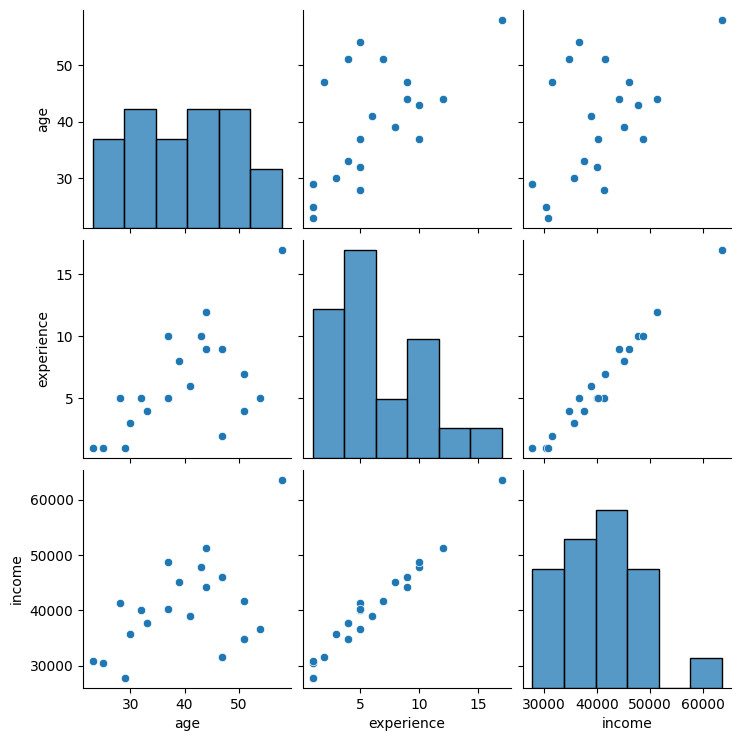

In [89]:
# La méthode '.pairplot()' est très utile pour visualiser les relations linéaires entre les variables :

sns.pairplot(df_income) 

Points à relever :
- On constate une linéarité forte entre les salaires et l'expérience, la linéarité est plus faible entre les salaires et l'âge.

- Nous pouvons donc affirmer que les variables prédictrices ont un pouvoir d'influence significative sur notre variable cible. 

<Axes: >

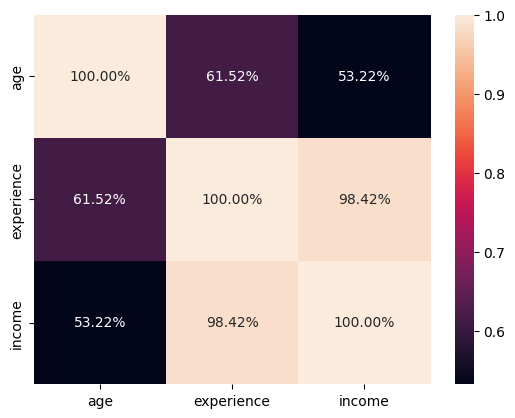

In [90]:
# Visualisation des coefficients de corrélation des variables de notre jeu de donnée

correlation_income = df_income.corr()
sns.heatmap(correlation_income, annot=True, fmt=".2%")

Points à relever :
- On observe une très forte corrélation positive de 98% entre l'expérience et le salaire, ce qui indique que l'expérience est un facteur déterminant majeur dans la variation des salaires. La corrélation entre l'âge et le salaire est de 53%, indiquant que l'âge a une influence modérée mais moins directe sur le salaire comparé à l'expérience.

- La corrélation relativement plus faible entre l'âge et le salaire, comparée à celle entre l'expérience et le salaire, montre que l'expérience est un prédicteur beaucoup plus significatif des salaires.

### C'est le moment d'initialiser notre modèle de régression !

In [91]:
# Il est temps de diviser notre jeu de donnée en quatre :

features = ['age', 'experience'] # Représente les variables prédictrices (qui explique le salaire)
target = 'income' # Représente le salaire, c'est notre variable cible

X = df_income[features] # Xs est un dataframe contenant deux colonnes
y = df_income[target] # y est un dataframe qui contient une colonne

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # C'est ici qu'on vient effectuer le split des données

print(f'Taille de X_train: {X_train.shape}, taille de X_test: {X_test.shape}, taille de y_train: {y_train.shape}, taille de y_test: {y_test.shape}')

Taille de X_train: (16, 2), taille de X_test: (4, 2), taille de y_train: (16,), taille de y_test: (4,)


Points à relever :
- On commence par diviser notre jeu de donnée en quatre parties :

    - On isole la variable cible des variables prédictrices.

    - On viens ensuite diviser notre jeu de données en deux, de façon aléatoire :
    
        - 80% des données sont réparties dans deux variables d'entraînement, X_train et y_train.
    
        - 20% des données sont réparties dans deux variables d'evaluation, X_test et y_test.

- On constate la bonne répartition des données dans chacunes de nos variables !

In [92]:
# Création du modèle de régression linéaire :

model = LinearRegression() # On initialise la fonction de régression (f(x)), dans une variable

model.fit(X_train, y_train) # Entraînement du modèle sur les données d'entraînement

y_pred = model.predict(X_test) # Prédiction sur l'ensemble de test

Points à relever :
- On vient initialiser dans une variable la fonction de régression pour pouvoir appliquer des méthodes dessus.

- Justement, on applique sur la variable la méthode '.fit()' :

    - On vient entraîner le modèle sur nos variables d'entraînement, X_train et y_train.

- On applique la méthode '.predict()' sur notre variable d'évaluation, X_test :

    - Cette méthode permet de créer 4 valeurs prédites en fonctions des variables prédictrices dans X_test.

In [93]:
# Calcul du coefficient de détermination R² : 

r2 = r2_score(y_test, y_pred)

print(f'Coefficient de détermination: {round(r2, 4)}') # Ce coefficicent indique la proportion de la variance des salaires qui est expliquée par le modèle
print(f'la précision du modèle en terme de prédiction est de : {round(r2, 2) * 100}%')

Coefficient de détermination: 0.9834
la précision du modèle en terme de prédiction est de : 98.0%


Points à relever :
- Un R² proche de 1 (ou 100%) suggère que le modèle explique bien la variabilité des salaires en fonction de l'âge et de l'expérience.

- Toutefois, un R² très élevé pourrait aussi indiquer un risque d'overfitting si le modèle est trop spécifique aux données d'entraînement, ce qui pourrait réduire sa capacité à généraliser sur de nouvelles données.

In [94]:
# Prédiction sur de nouvelles données :

df_predictions = pd.DataFrame({
    'age': [47, 50, 28, 19],
    'experience': [12, 20, 7, 2]
})

new_predictions = model.predict(df_predictions) # Prédiction des revenus avec les nouvelles données

df_predictions['predicted_income'] = new_predictions.round() # Affichage des prédictions

df_new_income = pd.concat([df_income, df_predictions]) # Concaténation des dataframes
df_new_income = df_new_income.reset_index().drop(columns='index') # Réinitialisation de l'index
display(df_new_income) # Affichage de notre jeu de données ayant les observations réelles et les observation prédites

,age,experience,income,predicted_income
0,25,1,30450.0,NaN
1,30,3,35670.0,NaN
2,47,2,31580.0,NaN
3,32,5,40130.0,NaN
4,43,10,47830.0,NaN
5,51,7,41630.0,NaN
6,28,5,41340.0,NaN
7,33,4,37650.0,NaN
8,37,5,40250.0,NaN
9,39,8,45150.0,NaN


Points à relever :
- Les nouvelles données incluent des âges de 41, 50, 28, et 30 ans avec respectivement 10, 20, 7, et 3 années d'expérience. Le modèle de régression linéaire est utilisé pour prédire les revenus basés sur ces nouvelles données.

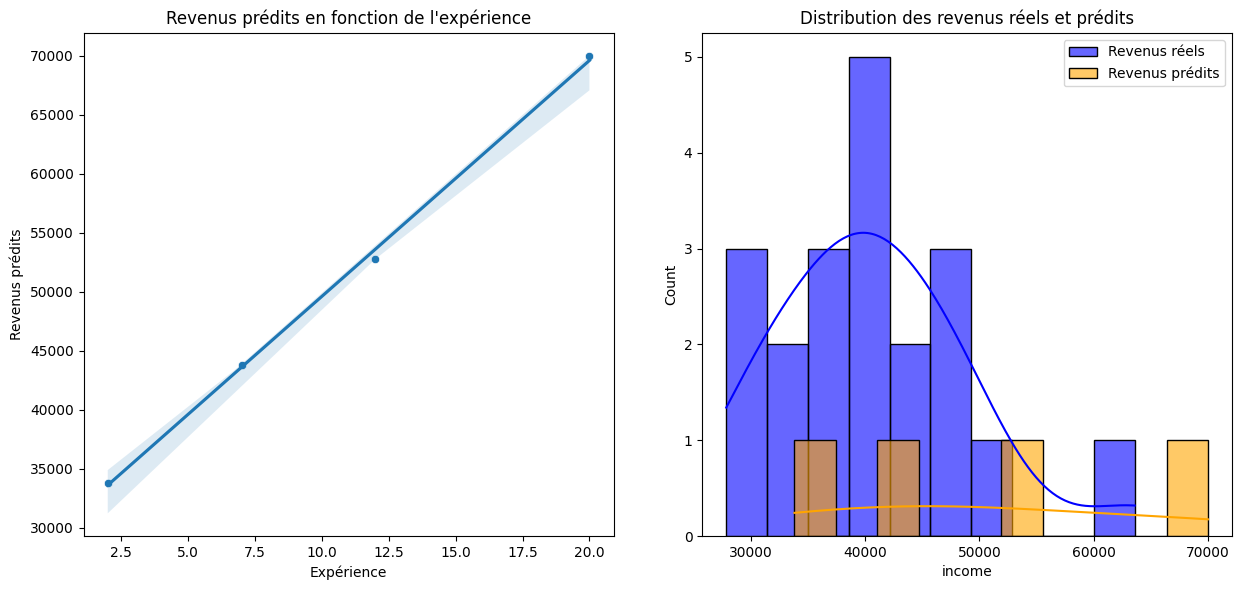

In [95]:
plt.figure(figsize=(18, 6)) # paramétrage de la taille de l'output

# Premier sous-graphique montrant la relation entre les revenus prédits et l'expérience :

plt.subplot(1, 3, 2)  
sns.scatterplot(x=df_new_income['experience'], y=df_new_income['predicted_income'])
sns.regplot(x=df_new_income['experience'], y=df_new_income['predicted_income'], scatter=False)
plt.xlabel('Expérience')
plt.ylabel('Revenus prédits')
plt.title('Revenus prédits en fonction de l\'expérience')

# Deuxième sous-graphique montrant la distribution des revenus réels et des revenus prédits :

plt.subplot(1, 3, 3)
sns.histplot(df_new_income['income'], kde=True, bins=10, color='blue', label='Revenus réels', alpha=0.6)
sns.histplot(df_new_income['predicted_income'], kde=True, bins=10, color='orange', label='Revenus prédits', alpha=0.6)
plt.legend()
plt.title('Distribution des revenus réels et prédits')

plt.tight_layout()
plt.show()

Points à relever :
- Malgré le fait que nous nous basons sur simplement quatres données prédites, il semble que le modèle est bien cohérent par rapport aux données des variables prédictrices !

# Appliquer la régression linéaire sur des données plus complexe...

### Forcément, les jeux de données sont rarement aussi simple !

Dans la première partie de notre live coding, nous avons exploré un exemple de modèle de régression linéaire sur un jeu de données relativement simple, mettant en relation les revenus prédits avec des variables telles que l'expérience et l'âge. Cependant, dans le monde réel, les jeux de données sont rarement aussi simples. 

##### Souvent, ils sont beaucoup plus riches et complexes, composés de multiples types de variables.

Dans cette deuxième partie, nous allons plonger dans un jeu de données plus complexe et plus riche. Nous explorerons un exemple de modèle de machine learning appliqué à un jeu de données comportant à la fois des données numériques et catégorielles.


In [96]:
df_salary = pd.read_csv('../datasets/salary_prediction_data.csv')
display(df_salary)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


### Traitement de la donnée avant d'initialiser le modèle :

In [97]:
df_salary.dtypes

Education      object
Experience      int64
Location       object
Job_Title      object
Age             int64
Gender         object
Salary        float64
dtype: object

Points à relever :
- On ne traite pas les données numériques de la même façon que les données catégorielles. Ici, nos variables ont le bon type de donnée.

In [98]:
df_salary.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

Points à relever :
- Il est essentiel d'enlever les valeurs manquantes avant d'initialiser un modèle de Machine Learning.

### Visualisation les variables de notre jeu de données :

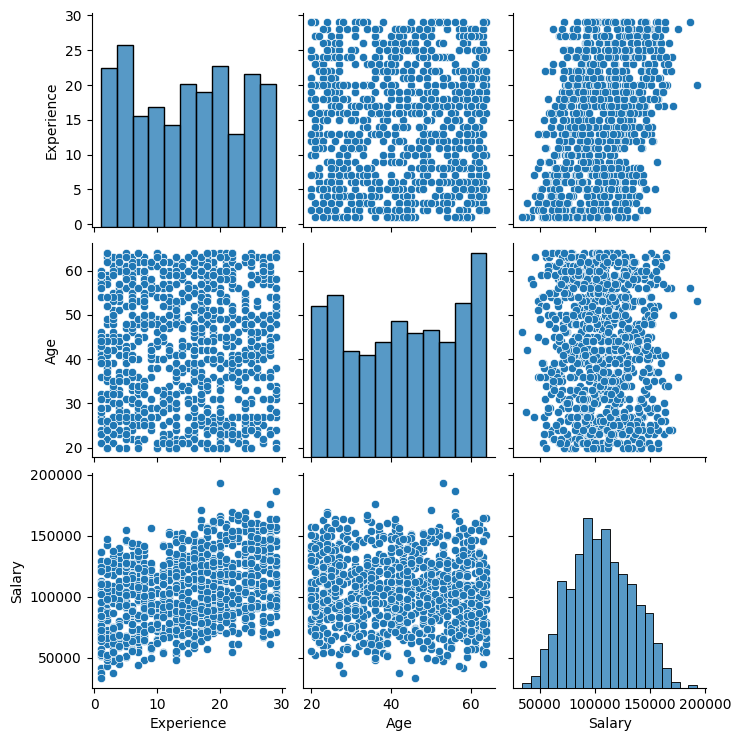

In [99]:
sns.pairplot(df_salary)

Points à relever :
- Nous constatons que nos variables prédictrices ne suivent pas une distribution normale, nous favoriserons donc le normalisateur : 'MinMaxScaler()' pour elles.

- Également, la relation entre nos features par rapport a notre target est difficile à déterminer. Cela reflète bien la réalité du marché et des salaires !

### Division de notre jeu de données :

In [100]:
features = ['Education', 'Experience' ,'Location', 'Job_Title', 'Age', 'Gender']
target = 'Salary'

X = df_salary[features] 
y = df_salary[target] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(f'Taille de X_train: {X_train.shape}, taille de X_test: {X_test.shape}, taille de y_train: {y_train.shape}, taille de y_test: {y_test.shape}')

Taille de X_train: (800, 6), taille de X_test: (200, 6), taille de y_train: (800,), taille de y_test: (200,)


Points à relever :
- Nous remarquons la bonne répartition de nos données dans nos quatres nouveaux objets.

### Commençons par traiter nos données numériques :

In [101]:
df_salary.select_dtypes(include='number')

mmscaler = MinMaxScaler() # Création d'un objet MinMaxScaler
cols_to_nor = ['Experience', 'Age'] # Appliquer la normalisation sur ces colonnes

# Normalisation de nos features avec le MinMaxScaler : 

X_train_nor = pd.DataFrame(mmscaler.fit_transform(X_train[cols_to_nor]), columns=cols_to_nor, index=X_train.index) # Appliquer le scaler sur l'ensemble de train
X_test_nor = pd.DataFrame(mmscaler.transform(X_test[cols_to_nor]), columns=cols_to_nor, index=X_test.index) # Appliquer le scaler à l'ensemble de test
display(X_test[cols_to_nor])
display(X_test_nor)

,Experience,Age
521,13,57
737,6,59
740,16,61
660,5,26
411,26,27
...,...,...
408,2,22
332,27,58
208,15,54
613,24,63


,Experience,Age
521,0.428571,0.840909
737,0.178571,0.886364
740,0.535714,0.931818
660,0.142857,0.136364
411,0.892857,0.159091
...,...,...
408,0.035714,0.045455
332,0.928571,0.863636
208,0.500000,0.772727
613,0.821429,0.977273


Points à relever :
- Ici, la normalisation des données nous à permis de mettre nos données à niveau pour éviter que notre modèle attribut un poid trop grand sur la variable 'Age'.

### Traitement de nos variables catégorielles :

In [112]:
display(df_salary.select_dtypes(include='O'))

print(f"Nombre de catégories différentes dans la variable genre : {df_salary['Gender'].nunique()}.")
print(f"Nombre de catégories différentes dans la variable métier : {df_salary['Job_Title'].nunique()}.")
print(f"Nombre de catégories différentes dans la variable zone : {df_salary['Location'].nunique()}.")
print(f"Nombre de catégories différentes dans la variable niveau d\'éducation : {df_salary['Education'].nunique()}.")

,Education,Location,Job_Title,Gender
0,High School,Urban,Manager,Male
1,PhD,Suburban,Director,Male
2,Bachelor,Suburban,Manager,Female
3,High School,Rural,Director,Male
4,PhD,Urban,Analyst,Female
...,...,...,...,...
995,High School,Suburban,Analyst,Female
996,High School,Urban,Engineer,Female
997,Master,Rural,Analyst,Male
998,Bachelor,Suburban,Director,Female


Nombre de catégories différentes dans la variable genre : 2.
Nombre de catégories différentes dans la variable métier : 4.
Nombre de catégories différentes dans la variable zone : 3.
Nombre de catégories différentes dans la variable niveau d'éducation : 4.


Points à relever : 
- Nous constatons qu'il n'y a pas beaucoup de catégorie sur nos variables, dans le cas contraire, il est judicieux de venir sélectionner les valeurs les plus représentés de nos variables pour éviter des problèmes de dimensionnalité dans notre modèle.

In [ ]:
# La méthode pandas .get_dummies() nous permet d'encoder nos variables catégorielles :

X_train_enc = pd.get_dummies(X_train.select_dtypes(include='O'), columns=['Gender', 'Job_Title', 'Location', 'Education'], drop_first=True).astype(int)
X_test_enc = pd.get_dummies(X_test.select_dtypes(include='O'), columns=['Gender', 'Job_Title', 'Location', 'Education'], drop_first=True).astype(int)
display(X_test_enc)

Points à relever :
- Nous constatons que le code n'a pas générer une nouvelle colonnes pour les premières catégories de nos variables, cela s'explique par le paramètre 'drop_first'. En effet, ce paramètre supprime intentionnellement la première catégorie de chaque variable catégorielle pour éviter la multicolinéarité.

- Ainsi, si Gender_Male est 0, cela indique implicitement que le genre est Female.

### Fusions de nos DataFrames normalisés et encodés :

In [ ]:
# Fusion des jeux de données pour nourrir notre modèle de régression :

X_train_clean = pd.merge(X_train_enc, X_train_nor, left_index=True, right_index=True)
X_test_clean = pd.merge(X_test_enc, X_test_nor, left_index=True, right_index=True)
display(X_test_clean)

In [ ]:
# Ajouter la variable target aux ensembles d'entraînement et de test :

df_train_clean = pd.merge(X_train_clean, y_train, left_index=True, right_index=True)
df_test_clean = pd.merge(X_test_clean, y_test, left_index=True, right_index=True)
display(df_test_clean)

Point à relever :
- Nous remarquons que nos données normalisées, nos données encodées et notre target variable ont été fusionnées correctement.

- Les étapes de normalisation et d'encodage des données permettent aux modèles de Machine Learning de comprendre les tendances mathématiques sous-jacentes de notre jeu de données.

- La normalisation assure que les différentes caractéristiques sont sur la même échelle, l'encodage des variables catégorielles transforme les catégories en un format numérique, facilement interprétable pour les modèles prédictifs.

### Initialisation du modèle linéaire :

In [ ]:
# Re-séparation des features et de la variable target pour notre modèle :

X_train_ml = df_train_clean.drop(columns=['Salary'])
X_test_ml = df_test_clean.drop(columns=['Salary'])
y_train_ml = df_train_clean['Salary']
y_test_ml = df_test_clean['Salary']

model = LinearRegression() # Création d'un objet LinearRegression()

model.fit(X_train_ml, y_train_ml) # Entraînement du modèle sur nos données qui y sont destinées
y_pred = model.predict(X_test_ml) # Prédictions sur l'ensemble de test

In [ ]:
# Évaluation du modèle :

mse = mean_squared_error(y_test_ml, y_pred)
rmse = sqrt(mean_squared_error(y_test_ml, y_pred))
r2 = r2_score(y_test_ml, y_pred)

print(f'L\'erreur quadratique moyenne ou MSE est égale à : {round(mse, 2)}.')
print(f'La racine carré du MSE ou RMSE est égale à : {round(rmse, 2)}.')
print(f'La performance du modèle pour prédire les salaires, donnée par le coefficient de détermination est de R² : {round(r2 * 100, 2)}%.')

# Affichage des coefficients du modèle :

coefficients = pd.DataFrame(model.coef_, X_train_ml.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False).round(2)
display(coefficients)

Points à relever :

- Le RMSE est la racine carrée du MSE. C'est une mesure plus interprétable que le MSE car elle est dans la même unité que la variable cible, soit en dollars. Un RMSE de 10,295.45 indique que, en moyenne, les prédictions de salaire du modèle sont à environ 10,295 dollars de la valeur réelle. Les coefficients sont également intéressants.

- Les valeurs de MSE et RMSE, bien qu'élevées, sont cohérentes avec la nature des données salariales qui peuvent varier de manière significative.

- La régression linéaire montre de bonnes performances avec un R² élevé, indiquant qu'elle explique bien les variations de salaire.

# Que faut t-il faire ensuite ?

#### Durant ce live coding, nous avons tenté de comprendre comment un modèle de régression linéaire fonctionnait.

### Mais quelles sont les prochaines étapes du Data Scientist après avoir constaté le R² et la MSE ?

### Il va falloir qu'il affûte son modèle !

Pour cela, il peut identifier les features qui ont le plus d'impact sur la prédiction des salaires. Il va donc utiliser des techniques comme la réduction de dimensions qui lui permettra de e débarrasser des features qui nous ralentissent et ne servent à rien.

##### Mais il va surtout tester le modèle sur plusieurs ensembles de données différents...

Pour s'assurer qu'il n'apprend pas par coeur les données et qu'il généralise bien à de nouvelles situations. 

### Il va ensuite déployer sont modèle de Machine Learning !

Il va choisir la plateforme idéale pour héberger sont modèle, en fonction de ses besoins en termes de puissance, de scalabilité et de coûts. Des options populaires incluent les plateformes cloud comme Google Cloud Platform, Amazon Web Services ou Microsoft Azure, ou encore des solutions sur site comme Docker ou Kubernetes.

Plus précisement, il va enregistrer sont modèle dans un format adéquat pour le déploiement, comme un fichier pickle. Il va ensuite créer un script ou une application pour charger le modèle, faire des prédictions et interpréter les résultats.

### Mais à la base des prédictions salariales des différents sites, il y a un script Python qui ressemble un peu au nôtre !